# Tugas Regressi Linear

Pada tugas ini akan ditunjukkan bagaimana melakukan regressi linear dengan menggunakan python dan cara-cara/library-library berikut:
- menggunakan invers matriks
- menggunakan numpy
- menggunakan statsmodel
- menggunakan scikit-learn
- menggunakan chainer <-- project lanjutan
- menggunakan lm (r-kernel)

# Langkah 1: Import Beberapa Library yang Dibutuhkan

In [1]:
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.graphics.regressionplots import abline_plot
from chainer import Chain, Variable
%matplotlib inline

C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\USER\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Ekstrak data dari file csv
Ambil file dengan menggunakan fungsi np.loadtxt(nama_file,delimiter) lalu simpan kedalam variabel 'data'

In [5]:
data_point = np.loadtxt('linear-regression.csv', delimiter=',')
data_point

array([[ 5.87050e-01,  5.79555e+00],
       [-1.50980e-01,  3.53372e+00],
       [-2.48050e-01,  3.22805e+00],
       [-3.60560e-01,  2.87947e+00],
       [ 9.37500e-02,  4.40297e+00],
       [-2.58470e-01,  3.22351e+00],
       [-1.71210e-01,  3.33413e+00],
       [-4.35840e-01,  2.64581e+00],
       [-1.77770e-01,  3.17808e+00],
       [ 6.31400e-01,  5.89149e+00],
       [-7.51210e-01,  1.63182e+00],
       [ 7.73800e-02,  4.16202e+00],
       [-3.53150e-01,  3.04898e+00],
       [ 1.77860e-01,  4.47832e+00],
       [-1.07640e-01,  3.40340e+00],
       [ 4.86610e-01,  5.45144e+00],
       [ 2.14300e-01,  4.74118e+00],
       [-4.60190e-01,  2.58099e+00],
       [-8.51420e-01,  1.51027e+00],
       [-4.86200e-02,  3.97839e+00],
       [ 2.88750e-01,  4.86927e+00],
       [ 8.92770e-01,  6.54291e+00],
       [ 3.78580e-01,  5.22406e+00],
       [ 2.79160e-01,  4.69183e+00],
       [ 4.43740e-01,  5.40699e+00],
       [ 4.76390e-01,  5.40892e+00],
       [-7.10070e-01,  1.93511e+00],
 

Masukkan nilai untuk variabel x, diwakilan oleh variabel ```point_x``` dengan cara diekstrak dari ```data_point[:,0]```

In [6]:
point_x = data_point[:,0]
point_x

array([ 0.58705, -0.15098, -0.24805, -0.36056,  0.09375, -0.25847,
       -0.17121, -0.43584, -0.17777,  0.6314 , -0.75121,  0.07738,
       -0.35315,  0.17786, -0.10764,  0.48661,  0.2143 , -0.46019,
       -0.85142, -0.04862,  0.28875,  0.89277,  0.37858,  0.27916,
        0.44374,  0.47639, -0.71007,  0.39965, -0.08275,  0.27483,
       -0.70887,  0.21256, -0.5876 ,  0.08218,  0.24345, -0.22549,
        0.11982, -0.13756, -0.64683,  0.17907, -0.00416,  0.48763,
       -0.17245,  0.61594, -0.50649,  0.23566, -0.07198, -0.61057,
        0.11442, -0.03187, -0.04633, -0.1315 , -0.1354 ,  0.21295,
       -0.2552 ,  0.20557, -0.43418,  0.10297,  0.1943 ,  0.01233,
       -0.54049,  0.02923,  0.9175 , -0.37388, -0.82708, -0.29438,
       -0.10156,  0.09209, -0.08249, -0.64397, -0.07143, -0.43457,
        0.36668,  0.02261, -0.40151, -0.15786, -0.0078 , -0.28635,
        0.20372, -0.16267, -0.05005,  0.85705,  0.20211,  0.22263,
        0.00368,  0.7176 ,  0.14863, -0.03477,  0.11045, -0.27

Begitu juga y, diwakilkan oleh variabel ```point_y``` dengan cara diektrak dari ```data_point[:,1]```

In [7]:
point_y = data_point[:,1]
point_y

array([5.79555, 3.53372, 3.22805, 2.87947, 4.40297, 3.22351, 3.33413,
       2.64581, 3.17808, 5.89149, 1.63182, 4.16202, 3.04898, 4.47832,
       3.4034 , 5.45144, 4.74118, 2.58099, 1.51027, 3.97839, 4.86927,
       6.54291, 5.22406, 4.69183, 5.40699, 5.40892, 1.93511, 5.3183 ,
       3.70831, 4.70114, 1.78144, 4.64785, 2.36904, 4.33018, 4.5812 ,
       3.33604, 4.23821, 3.45348, 2.00809, 4.5415 , 4.10607, 5.40747,
       3.48155, 5.7084 , 2.39071, 4.82726, 3.74389, 2.1777 , 4.27602,
       3.88965, 3.88686, 3.67183, 3.49113, 4.67873, 3.12481, 4.68855,
       2.74055, 4.21552, 4.5316 , 4.1083 , 2.42548, 3.98392, 6.98564,
       2.71958, 1.53684, 3.05788, 3.62269, 4.13679, 3.89883, 2.20617,
       3.89586, 2.65406, 5.0006 , 3.91445, 2.92545, 3.53233, 4.08026,
       3.26051, 4.75618, 3.53234, 3.83999, 6.43863, 4.60285, 4.57233,
       4.02064, 6.28391, 4.45149, 4.00773, 4.32023, 3.20861, 3.58077,
       4.0157 , 4.57241, 3.4647 , 5.28338, 5.6249 , 5.5003 , 3.96986,
       2.46482, 2.24

Gambar scatter plot dari kedua titik tersebut menggunakan fungsi ```plt.plot(titik_x,titik_y,jenis_tanda, nama_label)```

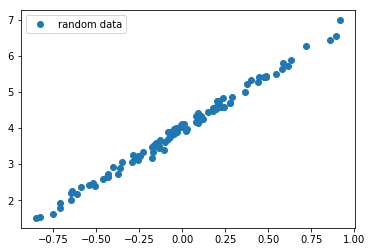

In [60]:
plt.plot(point_x,point_y, 'o', label = 'random data')
plt.legend()
plt.show()

## Melakukan Regresi Linear Menggunakan Invers Matriks

Buat model matriks menggunakan fungsi ```np.vstack(nilai_x,konstan)``` dengan ```konstan``` dibuat dengan menggunakan fungsi ```np.ones(banyak_nilai_konstan)```, dalam hal ini ```banyak_nilai_konstan``` dihitung sebanyak nilai x menggunakan fungsi ```len(nilai_x)```

In [141]:
matriks = np.vstack([np.ones(len(point_x)),point_x]).T

Misalkan bahwa $A \times x = y$ merupakan model regresi linear dimana x merupakan vektor yang terdiri dari ```intercept``` dan ```slope```, maka penyelesaian dari persamaan tersebut adalah $$x = (A^{T}A)^{-1}A^{T}y$$ dimana A merupakan model matriks dan y merupakan vektor respon.
Gunakan fungsi ```.matmul(matriks_A,matriks_B)``` untuk melakukan perkalian matriks dan fungsi ```.linalg.inv(matriks)``` untuk melakukan invers matriks

In [147]:
hasil = np.matmul(np.matmul(np.linalg.inv(np.matmul(matriks.T,matriks)), matriks.T),point_y)
hasil

array([ 3.99187633,  2.98060191])

Ekstrak nilai diatas dengan memanggil elemen dari array tersebut.

In [149]:
intercept = hasil[0]
slope = hasil[1]
print('intercept yang diperoleh = %.3f' %intercept)
print('slope yang diperoleh = %.3f' % slope)

intercept yang diperoleh = 3.992
slope yang diperoleh = 2.981


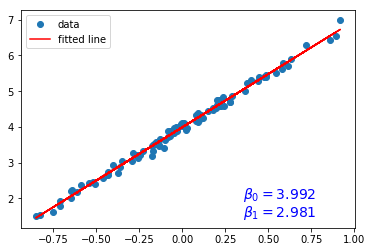

In [160]:
plt.plot(point_x,point_y,'o', label = 'data')
plt.plot(point_x,point_x*slope + intercept,'r', label = 'fitted line')
plt.text(0.35,2, r"$\beta_0 = 3.992$", fontsize=14, color="b")
plt.text(0.35, 1.5, r"$\beta_1 = 2.981$", fontsize=14, color="b")
plt.legend()
plt.show()

## Melakukan Regresi Linear Menggunakan Library Numpy

Buat model matriks menggunakan fungsi ```np.vstack(nilai_x,konstan)``` dengan ```konstan``` dibuat dengan menggunakan fungsi ```np.ones(banyak_nilai_konstan)```, dalam hal ini ```banyak_nilai_konstan``` dihitung sebanyak nilai x menggunakan fungsi ```len(nilai_x)```

In [64]:
matriks = np.vstack([point_x,np.ones(len(point_x))]).T
matriks

array([[ 0.58705,  1.     ],
       [-0.15098,  1.     ],
       [-0.24805,  1.     ],
       [-0.36056,  1.     ],
       [ 0.09375,  1.     ],
       [-0.25847,  1.     ],
       [-0.17121,  1.     ],
       [-0.43584,  1.     ],
       [-0.17777,  1.     ],
       [ 0.6314 ,  1.     ],
       [-0.75121,  1.     ],
       [ 0.07738,  1.     ],
       [-0.35315,  1.     ],
       [ 0.17786,  1.     ],
       [-0.10764,  1.     ],
       [ 0.48661,  1.     ],
       [ 0.2143 ,  1.     ],
       [-0.46019,  1.     ],
       [-0.85142,  1.     ],
       [-0.04862,  1.     ],
       [ 0.28875,  1.     ],
       [ 0.89277,  1.     ],
       [ 0.37858,  1.     ],
       [ 0.27916,  1.     ],
       [ 0.44374,  1.     ],
       [ 0.47639,  1.     ],
       [-0.71007,  1.     ],
       [ 0.39965,  1.     ],
       [-0.08275,  1.     ],
       [ 0.27483,  1.     ],
       [-0.70887,  1.     ],
       [ 0.21256,  1.     ],
       [-0.5876 ,  1.     ],
       [ 0.08218,  1.     ],
       [ 0.243

Lakukan analisis regresi dengan fungsi ```np.linalg.lstsq(model_matriks,nilai_y)```

In [66]:
hasil = np.linalg.lstsq(matriks,point_y)
hasil

(array([ 2.98060191,  3.99187633]),
 array([ 0.95073091]),
 2,
 array([ 10.0018249 ,   3.86767054]))

ekstrak nilai slope dan intercept dengan cara sebagai berikut:

In [73]:
slope = hasil[0][0]
intercept = hasil[0][1]
print('slope = %.3f' %slope)
print('intercept = %.3f' %intercept)

slope = 2.981
intercept = 3.992


## Melakukan Regresi Linear dengan Menggunakan Library StatsModel

Buat model matriks menggunakan fungsi ```sm.add_constant(nilai_variabel_x)```

In [165]:
constant = sm.add_constant(point_x)
constant

array([[ 1.     ,  0.58705],
       [ 1.     , -0.15098],
       [ 1.     , -0.24805],
       [ 1.     , -0.36056],
       [ 1.     ,  0.09375],
       [ 1.     , -0.25847],
       [ 1.     , -0.17121],
       [ 1.     , -0.43584],
       [ 1.     , -0.17777],
       [ 1.     ,  0.6314 ],
       [ 1.     , -0.75121],
       [ 1.     ,  0.07738],
       [ 1.     , -0.35315],
       [ 1.     ,  0.17786],
       [ 1.     , -0.10764],
       [ 1.     ,  0.48661],
       [ 1.     ,  0.2143 ],
       [ 1.     , -0.46019],
       [ 1.     , -0.85142],
       [ 1.     , -0.04862],
       [ 1.     ,  0.28875],
       [ 1.     ,  0.89277],
       [ 1.     ,  0.37858],
       [ 1.     ,  0.27916],
       [ 1.     ,  0.44374],
       [ 1.     ,  0.47639],
       [ 1.     , -0.71007],
       [ 1.     ,  0.39965],
       [ 1.     , -0.08275],
       [ 1.     ,  0.27483],
       [ 1.     , -0.70887],
       [ 1.     ,  0.21256],
       [ 1.     , -0.5876 ],
       [ 1.     ,  0.08218],
       [ 1.   

Buat model dari nila tersebut menggunakan fungsi ```sm.OLS(nilai_y,nilai_x_bersama_nilai_konstan)```

In [166]:
model = sm.OLS(point_y,constant)

Ekstrak nilai dalam model menggunakan method ```.fit()``` lalu simpan dalam variabel ```hasil```

In [167]:
hasil = model.fit()

Ekstrak nilai intercept dan slope menggunakan method ```.params```

In [168]:
hasil.params

array([ 3.99187633,  2.98060191])

Ambil nilai tersebut dengan memasukkannya kedalam variabel ```intercept``` dan ```slope```

In [169]:
intercept = hasil.params[0]
slope = hasil.params[1]
slope, intercept

(2.9806019093216429, 3.9918763347393833)

Melihat detail hasil analisis menggunakan method ```.summary()```

In [170]:
hasil.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.370e+04
Date:                Mon, 16 Apr 2018   Prob (F-statistic):          4.17e-107
Time:                        01:37:54   Log-Likelihood:                 90.891
No. Observations:                 100   AIC:                            -177.8
Df Residuals:                      98   BIC:                            -172.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9919      0.010    404.866      0.000       3.972       4.011
x1             2.9806      0.025    117.062      0.000       2.930       3.031
==============================================================================
Omnibus:                        0.551   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.759   Jarque-Bera (JB):                0.404
Skew:                          -0.156   Prob(JB):                        0.817
Kurtosis:                       2.996   Cond. No.                         2.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Gambar plot dari model menggunakn fungsi ```sm.graphics.abline_plot(variabel_model)```

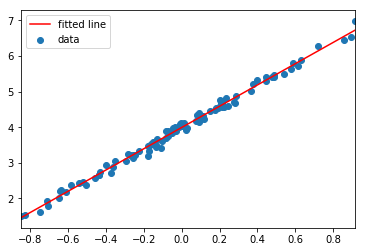

In [175]:
fig = sm.graphics.abline_plot(model_results=hasil, label = 'fitted line', color='red')
ax = fig.axes[0]
ax.scatter(constant[:,1], point_y,label='data')
ax.margins(.5)
plt.legend()
plt.show()

## Melakukan Regresi Linear Menggunakan Library SciPy

In [8]:
stats.linregress(x=point_x, y=point_y)

LinregressResult(slope=2.9806019093216456, intercept=3.9918763347393829, rvalue=0.99644335547710561, pvalue=4.1716771996270723e-107, stderr=0.025461679587514354)

Nilai diatas dapat dimasukkan kedalam variabel-variabel yang bisa ditentukan dan diformat ulang dengan cara sebagai berikut:

In [17]:
slope,intercept,r_square,p_value,standard_error = stats.linregress(x=point_x, y=point_y)

print('Hasil regressi linear menggunakan Library StatsModel dan fungsi stats.linregress')
print('slope atau tingkat kemiringan = %.3f' %slope)
print('intercept atau titik asal ketika x=0 adalah = %.3f' %intercept)
print('r_squared untuk menilai seberapa baik model yang dibuat adalah = %.3f' %r_square)
print('p_value yang diperoleh dari model adalah = %.10f < 0.05' %p_value)
print('standar deviasi model adalah = %.3f' %standard_error)

Hasil regressi linear menggunakan Library StatsModel dan fungsi stats.linregress
slope atau tingkat kemiringan = 2.981
intercept atau titik asal ketika x=0 adalah = 3.992
r_squared untuk menilai seberapa baik model yang dibuat adalah = 0.996
p_value yang diperoleh dari model adalah = 0.0000000000 < 0.05
standar deviasi model adalah = 0.025


Menggambar plot regressi

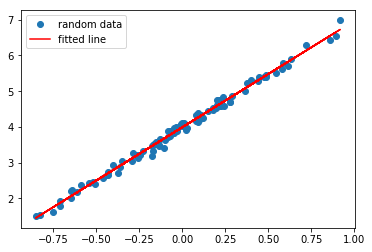

In [27]:
plt.plot(point_x, point_y, 'o', label='random data')
plt.plot(point_x, intercept + slope*point_x, 'r', label='fitted line')
plt.legend()
plt.show()

## Melakukan Regresi Linear Menggunakan Scikit Learn

Gunakan fungsi ```LinearRegression.fit(nilai_y,nilai_x)```

In [11]:
regr = linear_model.LinearRegression()

Ubah dimensi point_x ke dalam bentuk matriks ukuran banyak_x x 1 dengan fungsi ```.reshape(nilai_x,(banyak_baris,banyak_kolom))```

In [8]:
nilai_x = point_x.reshape(len(point_x),1)
nilai_x

array([[ 0.58705],
       [-0.15098],
       [-0.24805],
       [-0.36056],
       [ 0.09375],
       [-0.25847],
       [-0.17121],
       [-0.43584],
       [-0.17777],
       [ 0.6314 ],
       [-0.75121],
       [ 0.07738],
       [-0.35315],
       [ 0.17786],
       [-0.10764],
       [ 0.48661],
       [ 0.2143 ],
       [-0.46019],
       [-0.85142],
       [-0.04862],
       [ 0.28875],
       [ 0.89277],
       [ 0.37858],
       [ 0.27916],
       [ 0.44374],
       [ 0.47639],
       [-0.71007],
       [ 0.39965],
       [-0.08275],
       [ 0.27483],
       [-0.70887],
       [ 0.21256],
       [-0.5876 ],
       [ 0.08218],
       [ 0.24345],
       [-0.22549],
       [ 0.11982],
       [-0.13756],
       [-0.64683],
       [ 0.17907],
       [-0.00416],
       [ 0.48763],
       [-0.17245],
       [ 0.61594],
       [-0.50649],
       [ 0.23566],
       [-0.07198],
       [-0.61057],
       [ 0.11442],
       [-0.03187],
       [-0.04633],
       [-0.1315 ],
       [-0.1

Dengan cara yang sama, ubah dimensi dari point_y

In [9]:
nilai_y = point_y.reshape(len(point_y),1)
nilai_y

array([[5.79555],
       [3.53372],
       [3.22805],
       [2.87947],
       [4.40297],
       [3.22351],
       [3.33413],
       [2.64581],
       [3.17808],
       [5.89149],
       [1.63182],
       [4.16202],
       [3.04898],
       [4.47832],
       [3.4034 ],
       [5.45144],
       [4.74118],
       [2.58099],
       [1.51027],
       [3.97839],
       [4.86927],
       [6.54291],
       [5.22406],
       [4.69183],
       [5.40699],
       [5.40892],
       [1.93511],
       [5.3183 ],
       [3.70831],
       [4.70114],
       [1.78144],
       [4.64785],
       [2.36904],
       [4.33018],
       [4.5812 ],
       [3.33604],
       [4.23821],
       [3.45348],
       [2.00809],
       [4.5415 ],
       [4.10607],
       [5.40747],
       [3.48155],
       [5.7084 ],
       [2.39071],
       [4.82726],
       [3.74389],
       [2.1777 ],
       [4.27602],
       [3.88965],
       [3.88686],
       [3.67183],
       [3.49113],
       [4.67873],
       [3.12481],
       [4.

Lakukan regresi linear dengan menggunakan fungsi ```.fit(nilai_x,nilai_y)```

In [12]:
hasil = regr.fit(nilai_x,nilai_y)

Ekstrak nilai slope dengan menggunakan method ```.coef```

In [117]:
hasil.coef_

array([[ 2.98060191]])

Ekstrak nilai intercepy dengan menggunakan method ```.intercept```

In [122]:
hasil.intercept_

array([ 3.99187633])

Mencari nilai y prediksi berdasarkan model yang telah dibuat dengan fungsi ```.predict(nilai_x)```

In [13]:
nilai_y_prediksi = hasil.predict(nilai_x)
nilai_y_prediksi

array([[5.74163869],
       [3.54186506],
       [3.25253803],
       [2.91719051],
       [4.27130776],
       [3.22148016],
       [3.48156748],
       [2.6928108 ],
       [3.46201473],
       [5.87382838],
       [1.75281837],
       [4.22251531],
       [2.93927677],
       [4.52200619],
       [3.67104435],
       [5.44226703],
       [4.63061932],
       [2.62023314],
       [1.45413226],
       [3.84695947],
       [4.85252514],
       [6.6528683 ],
       [5.12027261],
       [4.82394116],
       [5.31448863],
       [5.41180528],
       [1.87544034],
       [5.18307389],
       [3.74523153],
       [4.81103516],
       [1.87901706],
       [4.62543308],
       [2.24047465],
       [4.2368222 ],
       [4.71750387],
       [3.31978041],
       [4.34901206],
       [3.58186474],
       [2.0639336 ],
       [4.52561272],
       [3.97947703],
       [5.44530724],
       [3.47787154],
       [5.82774827],
       [2.48223127],
       [4.69428498],
       [3.77733261],
       [2.172

Plot hasil diatas

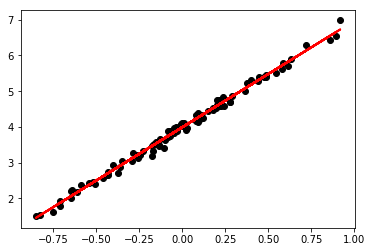

In [14]:
plt.plot(nilai_x, nilai_y, 'o', color='black', label = 'data')
plt.plot(nilai_x, nilai_y_prediksi, color='red', linewidth=2, label = 'fitted line')
plt.show()

## Regresi Linear Menggunakan Chainer

In [ ]:
class MyChain(Chain):
    def __init__(self):
        super(MyChain, self).__init__(
            l1=L.(None, 30),
            l2=L.Linear(None, 30),
            l3=L.Linear(None, 1)
        )
        
    def __call__(self, x):
        h = self.l1(x)
        h = self.l2(F.sigmoid(h))
        return self.l3(F.sigmoid(h))

## Regresi Linear Menggunakan R

Untuk bisa mengerjakan tahap ini diharuskan mengganti kernel-nya dengan r. r-kernel dapat diunduh melalui conda navigator.

Baca file csv dengan menggunakan fungsi ```read.csv(nama_file, pemisah)```

In [5]:
df = read.csv(file = 'linear-regression.csv',sep = ',')
df

X0.58705,X5.79555
-0.15098,3.53372
-0.24805,3.22805
-0.36056,2.87947
0.09375,4.40297
-0.25847,3.22351
-0.17121,3.33413
-0.43584,2.64581
-0.17777,3.17808
0.63140,5.89149
-0.75121,1.63182


Ambil nilai yang terdapat dalam ```df``` menggunakan notasi ```[,kolom]```

In [11]:
point_x = df[,1]
point_y = df[,2]
point_x
point_y

[1] -0.15098 -0.24805 -0.36056  0.09375 -0.25847 -0.17121 -0.43584 -0.17777
 [9]  0.63140 -0.75121  0.07738 -0.35315  0.17786 -0.10764  0.48661  0.21430
[17] -0.46019 -0.85142 -0.04862  0.28875  0.89277  0.37858  0.27916  0.44374
[25]  0.47639 -0.71007  0.39965 -0.08275  0.27483 -0.70887  0.21256 -0.58760
[33]  0.08218  0.24345 -0.22549  0.11982 -0.13756 -0.64683  0.17907 -0.00416
[41]  0.48763 -0.17245  0.61594 -0.50649  0.23566 -0.07198 -0.61057  0.11442
[49] -0.03187 -0.04633 -0.13150 -0.13540  0.21295 -0.25520  0.20557 -0.43418
[57]  0.10297  0.19430  0.01233 -0.54049  0.02923  0.91750 -0.37388 -0.82708
[65] -0.29438 -0.10156  0.09209 -0.08249 -0.64397 -0.07143 -0.43457  0.36668
[73]  0.02261 -0.40151 -0.15786 -0.00780 -0.28635  0.20372 -0.16267 -0.05005
[81]  0.85705  0.20211  0.22263  0.00368  0.71760  0.14863 -0.03477  0.11045
[89] -0.27443 -0.15219 -0.01239  0.21052 -0.17622  0.44270  0.57697  0.54242
[97] -0.02820 -0.52083 -0.63998

[1] 3.53372 3.22805 2.87947 4.40297 3.22351 3.33413 2.64581 3.17808 5.89149
[10] 1.63182 4.16202 3.04898 4.47832 3.40340 5.45144 4.74118 2.58099 1.51027
[19] 3.97839 4.86927 6.54291 5.22406 4.69183 5.40699 5.40892 1.93511 5.31830
[28] 3.70831 4.70114 1.78144 4.64785 2.36904 4.33018 4.58120 3.33604 4.23821
[37] 3.45348 2.00809 4.54150 4.10607 5.40747 3.48155 5.70840 2.39071 4.82726
[46] 3.74389 2.17770 4.27602 3.88965 3.88686 3.67183 3.49113 4.67873 3.12481
[55] 4.68855 2.74055 4.21552 4.53160 4.10830 2.42548 3.98392 6.98564 2.71958
[64] 1.53684 3.05788 3.62269 4.13679 3.89883 2.20617 3.89586 2.65406 5.00060
[73] 3.91445 2.92545 3.53233 4.08026 3.26051 4.75618 3.53234 3.83999 6.43863
[82] 4.60285 4.57233 4.02064 6.28391 4.45149 4.00773 4.32023 3.20861 3.58077
[91] 4.01570 4.57241 3.46470 5.28338 5.62490 5.50030 3.96986 2.46482 2.24709

Plot nilai x dan y tersebut menggunakan fungsi ```plot(nilai_x,nilai_y)```

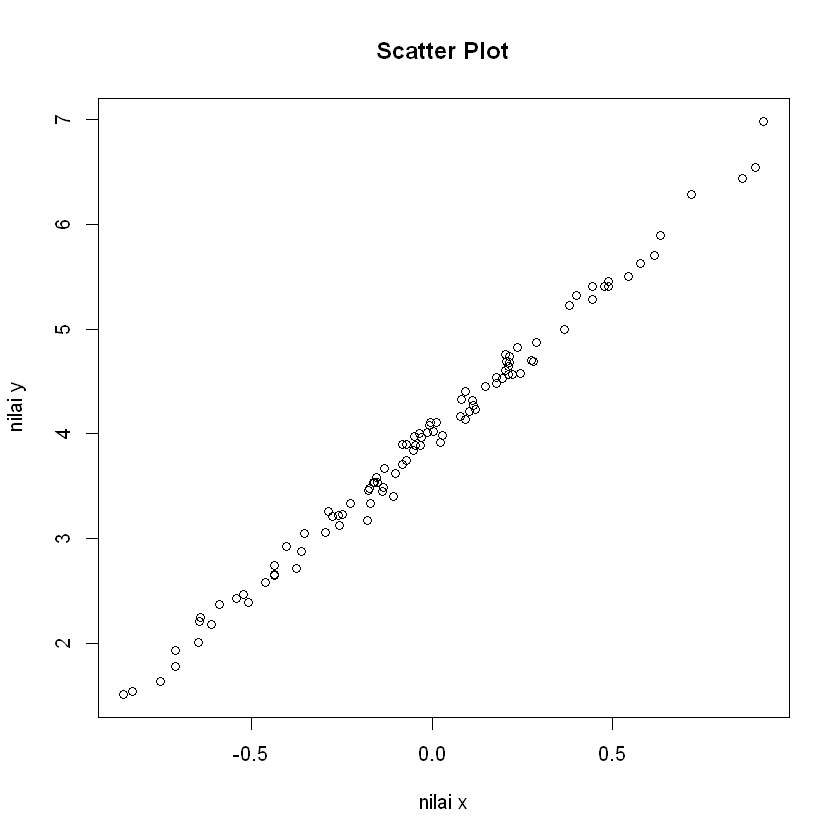

In [12]:
plot(point_x,point_y,xlab = 'nilai x', ylab='nilai y',main = 'Scatter Plot')

Melihat hasil regressi linear dengan fungsi ```lm(formula)``` dan melihat kesimpulan menggunakan fungsi ```summary(model)```

In [14]:
hasil = lm(point_y ~ point_x)
hasil
summary(hasil)


Call:
lm(formula = point_y ~ point_x)

Coefficients:
(Intercept)      point_x  
      3.991        2.978  



Call:
lm(formula = point_y ~ point_x)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.283738 -0.074062  0.003887  0.067388  0.261729 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.991278   0.009953   401.0   <2e-16 ***
point_x     2.978346   0.025873   115.1   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.09884 on 97 degrees of freedom
Multiple R-squared:  0.9927,	Adjusted R-squared:  0.9927 
F-statistic: 1.325e+04 on 1 and 97 DF,  p-value: < 2.2e-16


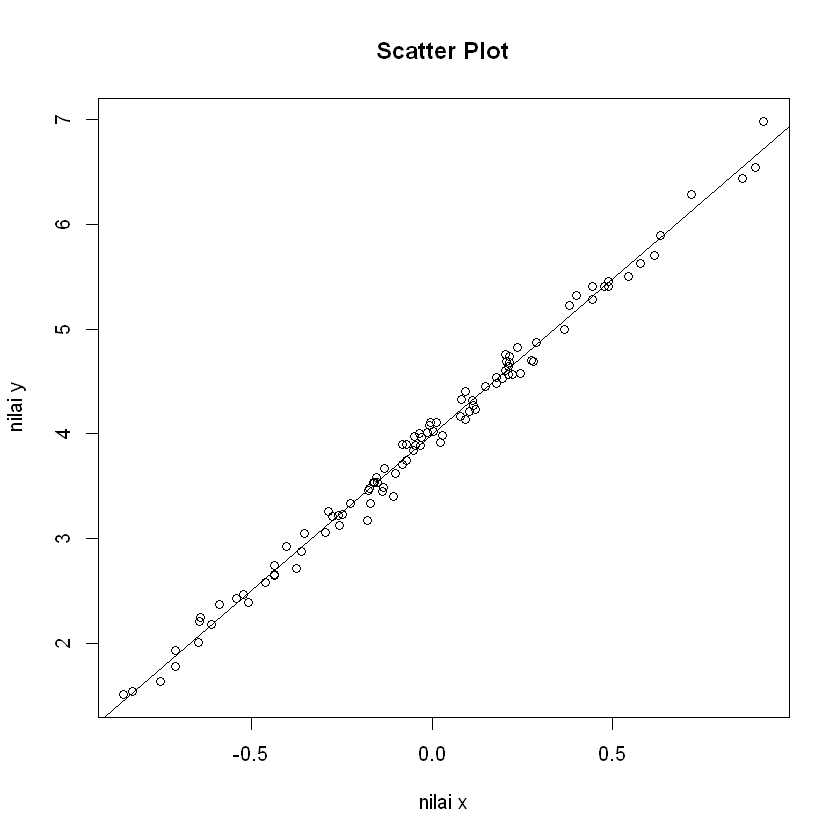

In [19]:
plot(point_x,point_y,xlab = 'nilai x', ylab='nilai y',main = 'Scatter Plot')
abline(3.991,2.978)